In [1]:
pip install pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Problem 1(a)

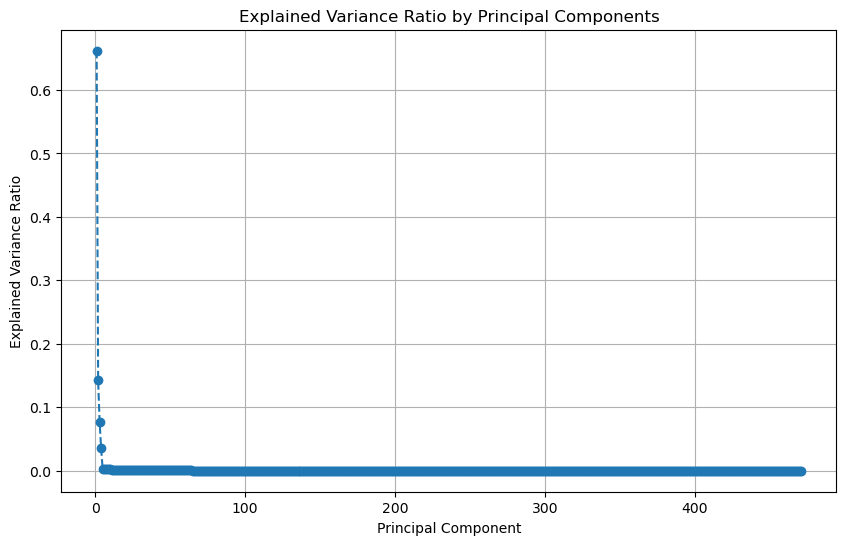

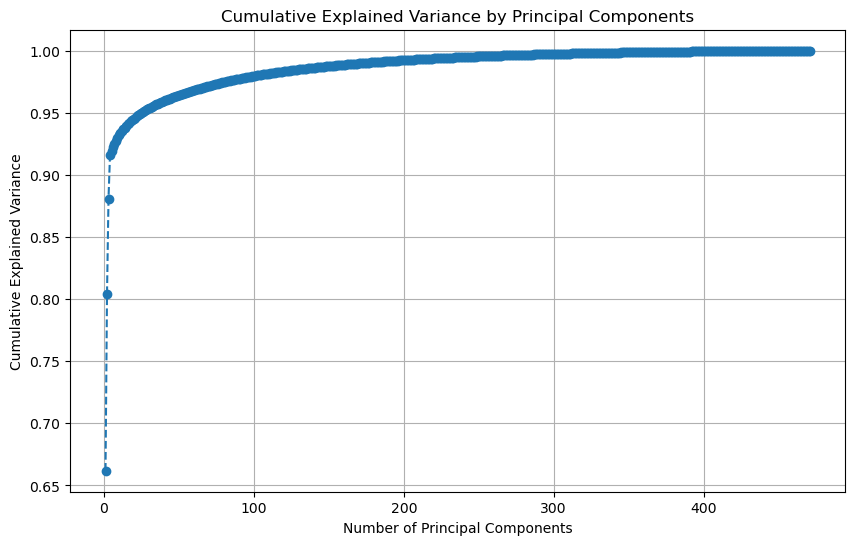

                 PC1       PC2       PC3       PC4       PC5       PC6  \
date                                                                     
2011-01-04  0.023919 -0.002476  0.024271  0.097121 -0.082135  0.037810   
2011-01-05 -0.006535  0.014102 -0.032441 -0.141822 -0.022196  0.002154   
2011-01-06 -0.026924  0.010967 -0.004575  0.058624 -0.011785 -0.007822   
2011-01-07  0.017775 -0.004164  0.017022  0.033606  0.009467  0.001184   
2011-01-10  0.026269 -0.001400  0.002981  0.012149 -0.005417 -0.005059   

                 PC7       PC8       PC9      PC10  ...      PC17      PC18  \
date                                                ...                       
2011-01-04  0.024542 -0.016327 -0.020506 -0.006149  ... -0.009589 -0.007085   
2011-01-05 -0.010606 -0.008960  0.014927  0.015679  ... -0.002245 -0.040350   
2011-01-06  0.021106 -0.006490  0.003566  0.040730  ... -0.005672  0.005223   
2011-01-07 -0.034687 -0.021291 -0.001657 -0.039609  ... -0.037222  0.020690   
2011-01

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data with explicit encoding
price_data = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0, encoding='latin1')
ticker_data = pd.read_csv("SP500_ticker.csv", index_col=0, encoding='latin1')

# Calculate log returns
log_returns = np.log(price_data / price_data.shift(1)).dropna()

# Fit PCA model
pca = PCA()
pca.fit(log_returns)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Select the number of components based on explained variance
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Fit PCA model with the selected number of components
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(log_returns)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, num_components + 1)], index=log_returns.index)

# Display the DataFrame with PCA results
print(pca_df.head())

# Combine PCA results with ticker data
pca_combined = pd.concat([pca_df, ticker_data], axis=1)

# Display the combined DataFrame
print(pca_combined.head())


# a(1)

In [3]:
import pandas as pd

# Load the raw stock price dataset
raw_price_data = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0, encoding='latin1')

# Calculate log returns
log_returns = np.log(raw_price_data / raw_price_data.shift(1)).dropna()

# Display the resulting log returns DataFrame
print(log_returns.head())


                 MMM       ACE       ABT       ANF      ADBE       AMD  \
date                                                                     
2011-01-04 -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806   
2011-01-05  0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837   
2011-01-06 -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001   
2011-01-07  0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982   
2011-01-10  0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961   

                 AES       AET       AFL         A  ...       WYN      WYNN  \
date                                                ...                       
2011-01-04  0.004773  0.005141 -0.018417 -0.009356  ... -0.006214  0.030719   
2011-01-05  0.013402  0.009569 -0.001949 -0.002172  ... -0.003286  0.012819   
2011-01-06  0.017081  0.018557 -0.005514  0.001931  ... -0.014589  0.007264   
2011-01-07  0.000000  0.002179 -0.003931  0.003369  ... -0.003681  0.034794   
2011-01

# a(2)

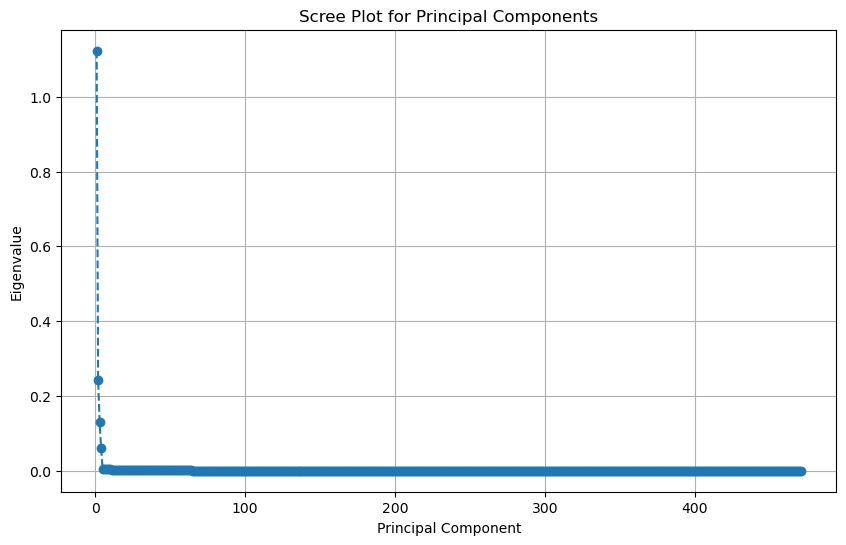

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the raw stock price dataset
raw_price_data = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0, encoding='latin1')

# Calculate log returns
log_returns = np.log(raw_price_data / raw_price_data.shift(1)).dropna()

# Fit PCA model
pca = PCA()
pca.fit(log_returns)

# Get eigenvalues from the PCA
eigenvalues = pca.explained_variance_

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()


# a(3)

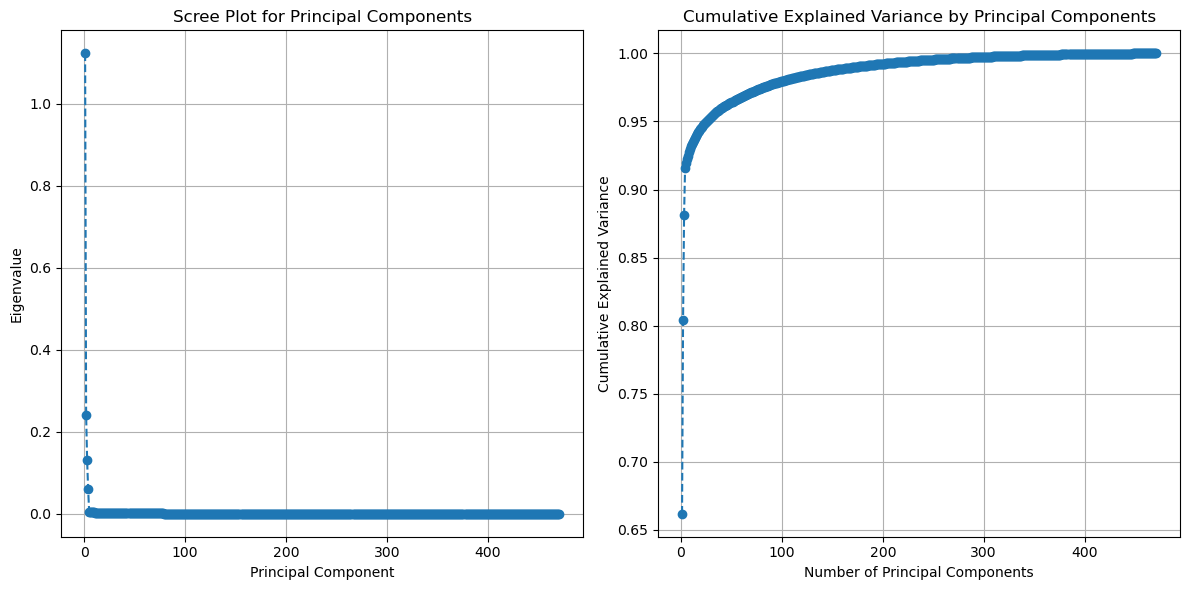

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the raw stock price dataset
raw_price_data = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0, encoding='latin1')

# Calculate log returns
log_returns = np.log(raw_price_data / raw_price_data.shift(1)).dropna()

# Fit PCA model
pca = PCA()
pca.fit(log_returns)

# Get eigenvalues from the PCA
eigenvalues = pca.explained_variance_

# Scree plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)

# Get explained variance ratio from the PCA
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Cumulative variance plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

plt.tight_layout()
plt.show()


# a(4)

In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
close_prices = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0)

# Calculate log returns
log_returns = np.log(close_prices / close_prices.shift(1))
log_returns = log_returns.dropna()

# Standardize the data
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca.fit(log_returns_standardized)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components for 80% variance retention
n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1

print(f"Number of components needed for 80% of variance retention: {n_components_80}")


Number of components needed for 80% of variance retention: 127


# b(1)

In [7]:
pip install yfinance


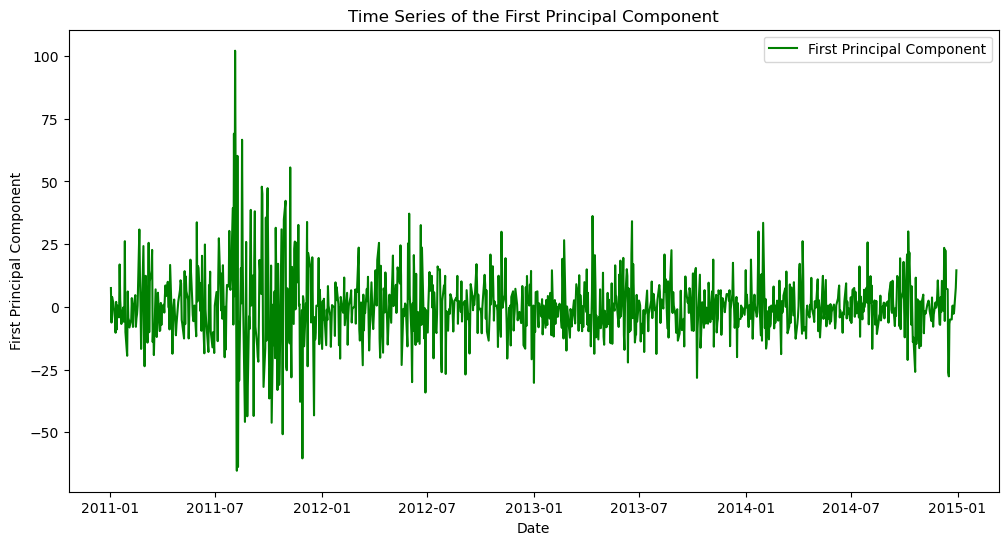

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
close_prices = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0)

# Calculate log returns
log_returns = np.log(close_prices / close_prices.shift(1))
log_returns = log_returns.dropna()

# Standardize the data
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
principal_components = pca.fit_transform(log_returns_standardized)

# Extract the 1st principal component
pc1 = principal_components[:, 0]

# Ensure that the length of the index matches the length of pc1
close_prices.index = pd.to_datetime(close_prices.index)  # Ensure the index is in datetime format
close_prices = close_prices.iloc[:-1]  # Adjust the length of close_prices to match pc1

# Plot the time series of the 1st principal component
plt.figure(figsize=(12, 6))
plt.plot(close_prices.index, pc1, label='First Principal Component', color='green')
plt.title('Time Series of the First Principal Component')
plt.xlabel('Date')
plt.ylabel('First Principal Component')
plt.legend()
plt.show()


# b(2)

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Load the raw stock price dataset
raw_price_data = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0, encoding='latin1')

# Calculate log returns
log_returns = np.log(raw_price_data / raw_price_data.shift(1)).dropna()

# Fit PCA model
pca = PCA()
pca_result = pca.fit_transform(log_returns)

# Extract the weights for the 1st and 2nd principal components
weights_pc1 = pca.components_[0]
weights_pc2 = pca.components_[1]

# Create DataFrames for better visualization
weights_df_pc1 = pd.DataFrame({'Stock': log_returns.columns, 'Weight PC1': weights_pc1})
weights_df_pc2 = pd.DataFrame({'Stock': log_returns.columns, 'Weight PC2': weights_pc2})

# Display the DataFrames
print("Weights for the 1st Principal Component:")
print(weights_df_pc1)

print("\nWeights for the 2nd Principal Component:")
print(weights_df_pc2)


Weights for the 1st Principal Component:
    Stock  Weight PC1
0     MMM   -0.000253
1     ACE   -0.000424
2     ABT    0.000071
3     ANF   -0.000285
4    ADBE   -0.000573
..    ...         ...
466    XL   -0.000474
467  YHOO    0.000109
468   YUM   -0.000038
469   ZMH   -0.000523
470  ZION   -0.000849

[471 rows x 2 columns]

Weights for the 2nd Principal Component:
    Stock  Weight PC2
0     MMM   -0.000499
1     ACE   -0.000912
2     ABT   -0.000076
3     ANF    0.000185
4    ADBE   -0.000188
..    ...         ...
466    XL   -0.000170
467  YHOO    0.000331
468   YUM   -0.001039
469   ZMH    0.000182
470  ZION   -0.000629

[471 rows x 2 columns]


# b(3)

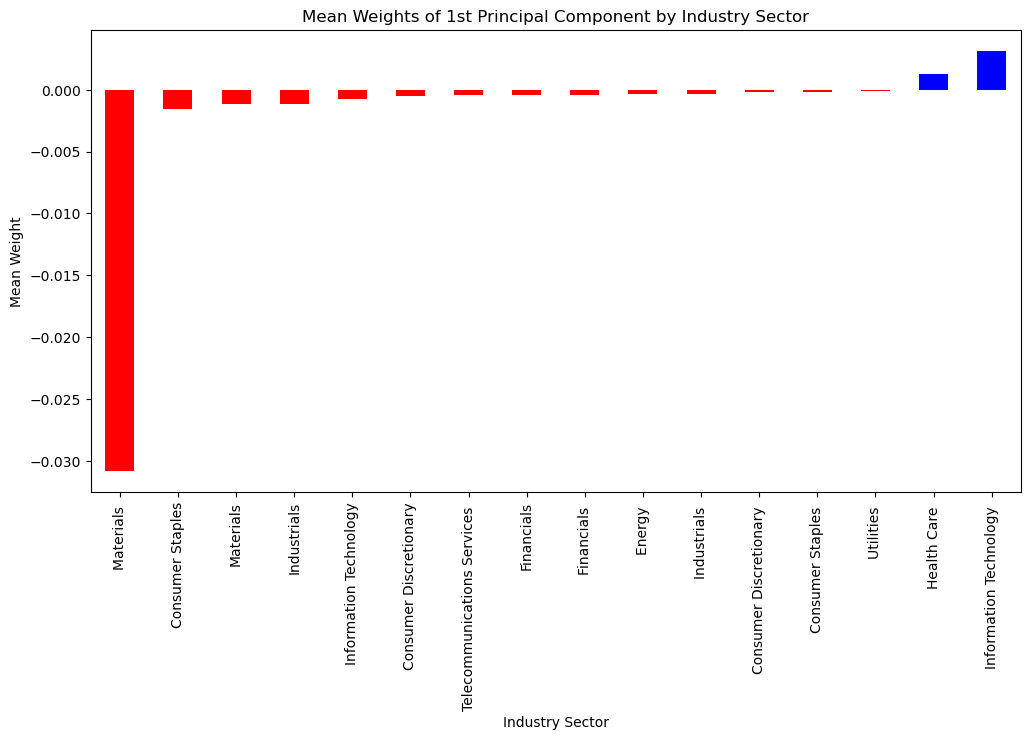

In [10]:
weights_1st_component = pca.components_[0]
# Merge ticker information with weights
weights_df = pd.DataFrame({"Ticker": close_prices.columns, "Weight": weights_1st_component})
merged_df = pd.merge(ticker_data, weights_df, left_on="ticker", right_on="Ticker")

# Group by industry sector and calculate mean weight
mean_weights_by_sector = merged_df.groupby("sector")["Weight"].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(12, 6))
mean_weights_by_sector.plot(kind="bar", color=np.where(mean_weights_by_sector >= 0, 'b', 'r'))
plt.title('Mean Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()

# b(4)

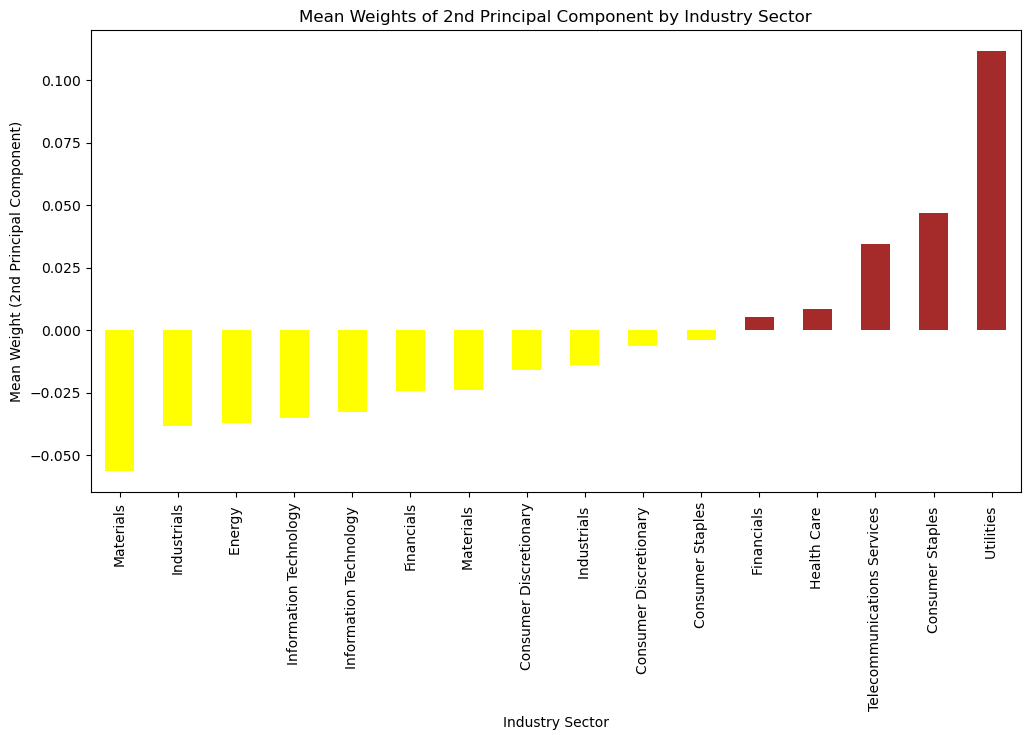

In [24]:
# Extract the weights for the 2nd principal component
weights_2nd_component = pca.components_[1]

# Merge ticker information with weights for the 2nd principal component
weights_df_2nd = pd.DataFrame({"Ticker": close_prices.columns, "Weight_2nd": weights_2nd_component})
merged_df_2nd = pd.merge(ticker_data, weights_df_2nd, left_on="ticker", right_on="Ticker")

# Group by industry sector and calculate mean weight for the 2nd principal component
mean_weights_by_sector_2nd = merged_df_2nd.groupby("sector")["Weight_2nd"].mean().sort_values()

# Create a bar plot for the 2nd principal component
plt.figure(figsize=(12, 6))
mean_weights_by_sector_2nd.plot(kind="bar", color=np.where(mean_weights_by_sector_2nd >= 0, 'brown', 'yellow'))
plt.title('Mean Weights of 2nd Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight (2nd Principal Component)')
plt.show()

In [27]:
print("Length of weights_pc2:", len(weights_pc2))


Length of weights_pc2: 471


# 1(c)

In [12]:
!pip install yfinance

In [13]:
import yfinance as yf
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define a list of stock tickers to fetch data
stock_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB']  # Add more tickers as needed

# Exclude 'FB' ticker
stock_tickers.remove('FB')

# Fetch stock price data for remaining valid tickers
stock_data = yf.download(stock_tickers, start='2023-01-01', end='2023-11-27')['Adj Close']

# Drop any columns (tickers) with missing values
stock_data.dropna(axis=1, inplace=True)

# Transpose the data to have dates as rows and stocks as columns
stock_data = stock_data.transpose()

# Convert stock_data to a numpy array for StandardScaler
stock_data_array = stock_data.values  # Convert DataFrame to numpy array

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stock_data_array)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Obtain transformed data using PCA
pca_transformed = pca.transform(scaled_data)

# Retrieve explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratio for each principal component
print("Explained Variance Ratio:")
print(explained_variance_ratio)

[*********************100%%**********************]  4 of 4 completed
Explained Variance Ratio:
[9.96715248e-01 2.66159431e-03 6.23157885e-04 2.56764465e-33]


# Problem-2

   Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  Ankle  \
0   22   160.8    62.4  34.0   95.8     87.9   99.2   59.6  38.9   24.0   
1   22   170.6    80.5  38.5   93.6     83.0   98.7   58.7  37.3   23.4   
2   23   153.9    69.3  36.2   93.1     85.2   94.5   59.0  37.3   21.9   
3   23   157.1    70.4  35.5   92.1     77.1   93.9   56.1  36.1   22.7   
4   23   196.5    88.6  38.0   96.6     85.3  102.5   59.1  37.6   23.2   

   Biceps  Forearm  Wrist  fatpctg  
0    28.8     25.2   16.6     25.3  
1    30.5     28.9   18.2      6.1  
2    32.0     27.4   17.1     12.3  
3    30.5     27.2   18.2      9.4  
4    31.8     29.7   18.3     10.3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      252 non-null    int64  
 1   Weight   252 non-null    float64
 2   Height   252 non-null    float64
 3   Neck     252 non-null    fl

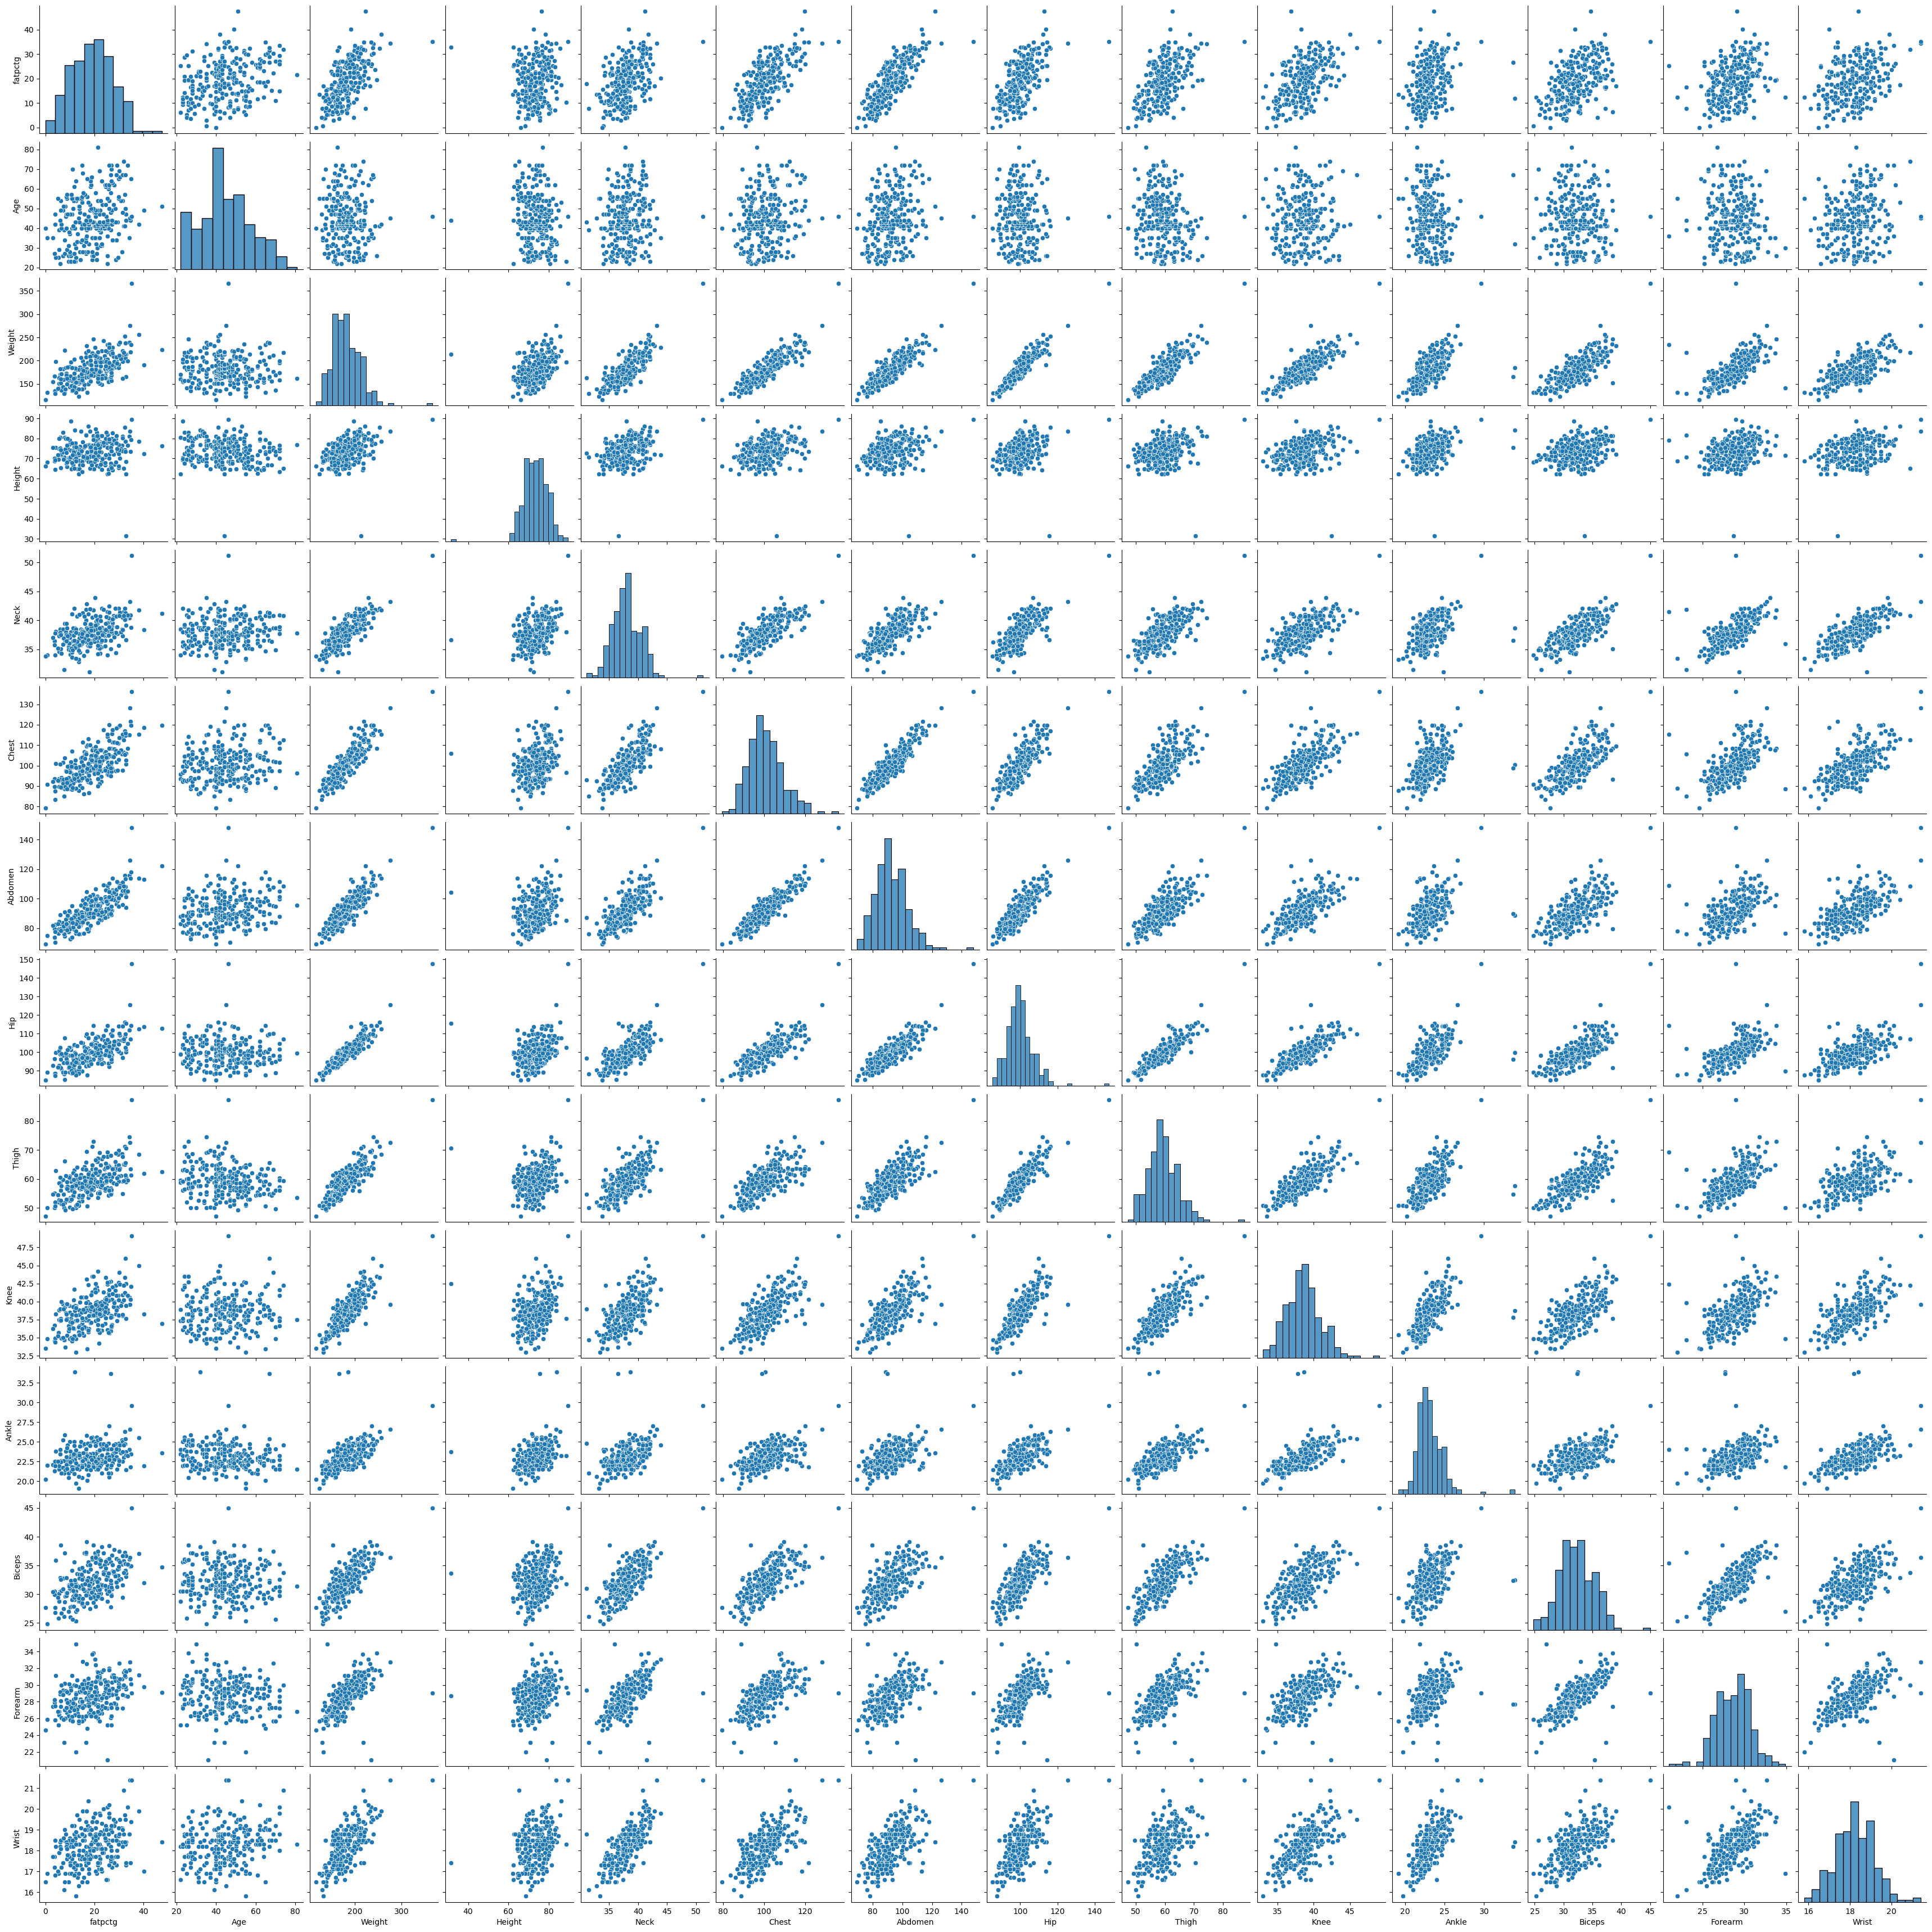

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Explore the Data
data = pd.read_csv('BMI.csv')
print(data.head())
print(data.info())
print(data.describe())

# Step 2: Data Preprocessing (if needed)

# Step 3: Feature Selection
X = data.drop('fatpctg', axis=1)  # Features
y = data['fatpctg']  # Target variable

# Use SelectKBest with f_regression as the score function
selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X, y)

# Get selected feature indices and names
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

# Step 4: Model Building
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Interpretation and Analysis
print(f"Selected Features: {selected_features}")
print(f"Model Coefficients: {model.coef_}")

# Visualize the correlation between selected features and the target variable
sns.pairplot(data[['fatpctg'] + list(selected_features)])
plt.show()

# 2(a)

In [15]:
import pandas as pd
import statsmodels.api as sm

# Load your dataset
data = pd.read_csv('BMI.csv')

# Separate features (X) and target variable (y)
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Forward Stepwise Regression
def forward_stepwise_selection(X, y):
    features = []
    remaining_features = set(X.columns)

    while remaining_features:
        best_pvalue = float('inf')
        best_feature = None

        for feature in remaining_features:
            X_temp = sm.add_constant(X[features + [feature]])
            model = sm.OLS(y, X_temp).fit()
            pvalue = model.pvalues[feature]

            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature

        if best_pvalue < 0.05:  # You can adjust the significance level
            features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    return features

# Backward Stepwise Regression
def backward_stepwise_selection(X, y):
    features = list(X.columns)

    while len(features) > 0:
        X_temp = sm.add_constant(X[features])
        model = sm.OLS(y, X_temp).fit()
        pvalues = model.pvalues.iloc[1:]

        if pvalues.max() > 0.05:  # You can adjust the significance level
            remove_feature = pvalues.idxmax()
            features.remove(remove_feature)
        else:
            break

    return features

# Perform forward and backward stepwise selection
forward_selected_features = forward_stepwise_selection(X, y)
backward_selected_features = backward_stepwise_selection(X, y)

print("Forward Selected Features:", forward_selected_features)
print("Backward Selected Features:", backward_selected_features)


Forward Selected Features: ['Abdomen', 'Weight', 'Wrist', 'Forearm']
Backward Selected Features: ['Age', 'Neck', 'Abdomen', 'Hip', 'Thigh', 'Forearm', 'Wrist']


# 2(b)

In [16]:
import pandas as pd

# Load your dataset
data = pd.read_csv('BMI.csv')

# Separate features (X) and target variable (y)
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Calculate correlation between each feature and the target variable
correlations = X.apply(lambda x: x.corr(y))

# Rank features based on absolute correlation values
ranked_features = correlations.abs().sort_values(ascending=False)

print("Ranking of features based on correlation:")
print(ranked_features)

Ranking of features based on correlation:
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
dtype: float64


# 2(c)

In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset
data = pd.read_csv('BMI.csv')

# Separate features (X) and target variable (y)
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Lasso regression model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter

# Fit the model to the training data
lasso.fit(X_train_scaled, y_train)

# Print the coefficients (feature weights) after fitting
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print(coefficients)

# Select features with non-zero coefficients
selected_features_lasso = coefficients[coefficients['Coefficient'] != 0]['Feature']
print("Selected features by Lasso:")
print(selected_features_lasso)

    Feature  Coefficient
0       Age     0.818081
1    Weight    -0.564124
2    Height    -0.423096
3      Neck    -0.614401
4     Chest    -0.000000
5   Abdomen     8.433105
6       Hip    -0.000000
7     Thigh     0.086877
8      Knee     0.000000
9     Ankle     0.000000
10   Biceps     0.531767
11  Forearm     0.175674
12    Wrist    -1.896782
Selected features by Lasso:
0         Age
1      Weight
2      Height
3        Neck
5     Abdomen
7       Thigh
10     Biceps
11    Forearm
12      Wrist
Name: Feature, dtype: object


In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset
data = pd.read_csv('BMI.csv')

# Separate features (X) and target variable (y)
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Lasso regression model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter

# Fit the model to the training data
lasso.fit(X_train_scaled, y_train)

# Print the coefficients (feature weights) after fitting
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print(coefficients)

# Select features with non-zero coefficients
selected_features_lasso = coefficients[coefficients['Coefficient'] != 0]['Feature']
print("Selected features by Lasso:")
print(selected_features_lasso)


    Feature  Coefficient
0       Age     0.818081
1    Weight    -0.564124
2    Height    -0.423096
3      Neck    -0.614401
4     Chest    -0.000000
5   Abdomen     8.433105
6       Hip    -0.000000
7     Thigh     0.086877
8      Knee     0.000000
9     Ankle     0.000000
10   Biceps     0.531767
11  Forearm     0.175674
12    Wrist    -1.896782
Selected features by Lasso:
0         Age
1      Weight
2      Height
3        Neck
5     Abdomen
7       Thigh
10     Biceps
11    Forearm
12      Wrist
Name: Feature, dtype: object


In [19]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf = RandomForestRegressor()

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})

# Rank features based on importance
ranked_features_rf = feature_importances.sort_values(by='Importance', ascending=False)
print("Ranking of features based on Random Forest importance:")
print(ranked_features_rf)

Ranking of features based on Random Forest importance:
    Feature  Importance
5   Abdomen    0.715113
12    Wrist    0.031070
1    Weight    0.029421
2    Height    0.028300
3      Neck    0.027797
6       Hip    0.026719
4     Chest    0.025967
0       Age    0.023890
8      Knee    0.021179
10   Biceps    0.020002
9     Ankle    0.018244
11  Forearm    0.016715
7     Thigh    0.015581


Random Forest Feature Importances:
Abdomen    0.711267
Wrist      0.030853
Height     0.030264
Hip        0.029829
Weight     0.029763
Knee       0.024540
Chest      0.024428
Age        0.023622
Neck       0.023329
Ankle      0.020496
Biceps     0.018369
Forearm    0.018308
Thigh      0.014930
dtype: float64


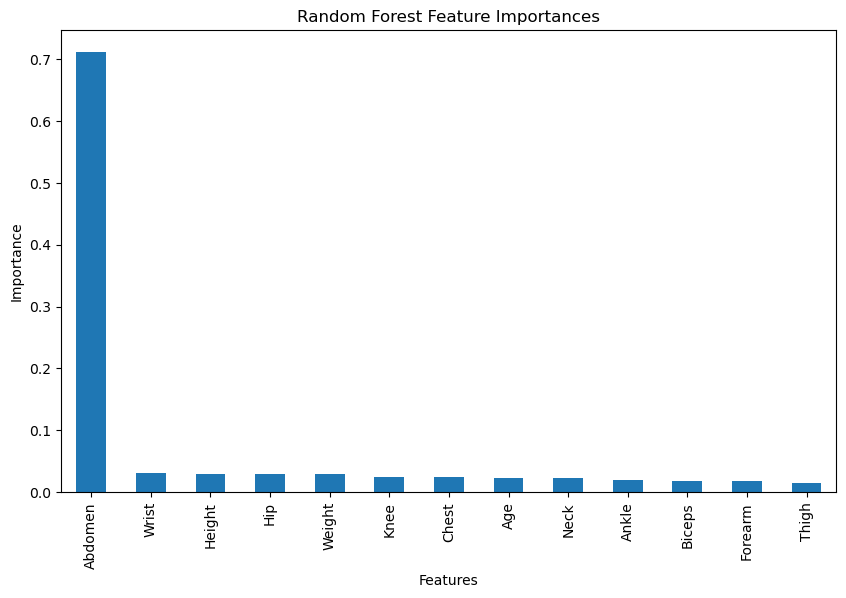

In [20]:
# (2) Random Forest (feature importance ranking)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Random Forest Feature Importances:")
print(feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()